# The Office Final Notebook

![The Office](the_office.jpg)

In [88]:
# imports

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve
import statsmodels.api as sm

# importing functions from wrangle file
from wrangle import the_office, guest_office, season_episodes, max_views, cluster_df, office_time, office_time_model

from sklearn.model_selection import train_test_split

# Statistical Tests
import scipy.stats as stats

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

# Acquire

In [2]:
# getting the office data from wrangle file
df = the_office()
df.head() # check_yo_head

,episode,season,episode_title,about,ratings,votes,viewership,duration,date,director,writers,color
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,yellow
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,Ken Kwapis,B. J. Novak,lightgreen
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,Ken Whittingham,Paul Lieberstein,yellow
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,12 April 2005,Bryan Gordon,Michael Schur,yellow
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,19 April 2005,Greg Daniels,Greg Daniels,lightgreen


### Let's Make a Word Cloud of The Office

(-0.5, 1199.5, 799.5, -0.5)

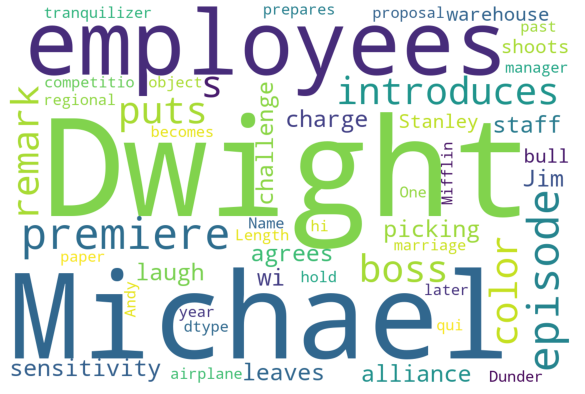

In [3]:
about = df.about
# wordcloud of what each episode is about
img = WordCloud(background_color='white', width=1200, height=800).generate(str(about))
plt.imshow(img)
plt.axis('off')

In [4]:
# getting the guest office data from wrangle file
guest_df = guest_office()
guest_df.head() # check_yo_head

,episode,season,episode_title,about,ratings,votes,viewership,duration,date,guest_stars,director,writers,color
5,5,1,Hot Girl,Michael is just one of the many male staff who...,7.7,3854,4.8,23,26 April 2005,Amy Adams,Amy Heckerling,Mindy Kaling,yellow
8,8,2,Office Olympics,"Ready to finalize his deal for a new condo, Mi...",8.4,3665,8.3,22,4 October 2005,Nancy Carell,Paul Feig,Michael Schur,lightgreen
9,9,2,The Fire,A fire in the kitchen relegates the staff to t...,8.4,3607,7.6,22,11 October 2005,Amy Adams,Ken Kwapis,B. J. Novak,lightgreen
12,12,2,The Client,With Michael and Jan Levinson-Gould away from ...,8.6,3533,7.5,22,8 November 2005,Tim Meadows,Greg Daniels,Paul Lieberstein,lightgreen
14,14,2,E-Mail Surveillance,Michael decides to set up e-mail surveillance ...,8.4,3338,8.1,23,22 November 2005,Ken Jeong,Paul Feig,Jennifer Celotta,lightgreen


In [5]:
guest_df.shape

(29, 13)

- It looks like there are 29 episodes with a guest star
- I created a guest dataframe if I wanted to explore it further

In [6]:
# looking at how many seasons and episodes there are
season_episodes()

,season,episodes
0,1,6
1,2,22
2,3,23
3,4,14
4,5,26
5,6,26
6,7,24
7,8,24
8,9,23


### Takeaways
- There are 9 seasons of The Office
- Season 1 was the shortest season with only 6 episodes
- Season 2 through 9 averaged between 22 to 26 episodes with the exeption of season 4 with 14 episodes

# Explore

# Let's see what was the most popular episode

In [7]:
# using the max views function from wrangle to look at the most popular episode
max_views()

episode                                                         77
season                                                           5
episode_title                                        Stress Relief
about            Dwight's too-realistic fire alarm gives Stanle...
ratings                                                        9.7
votes                                                         8170
viewership                                                   22.91
duration                                                        60
date                                               1 February 2009
director                                             Jeffrey Blitz
writers                                           Paul Lieberstein
color                                                    darkgreen
Name: 77, dtype: object

In [8]:
# viewing the full summary of what the episode "Stress Relief" is about
max_views().about

"Dwight's too-realistic fire alarm gives Stanley a heart attack. When he returns, Michael learns that he is the cause of Stanley's stress. To remedy the situation, he forces the office to throw a roast for him."

### The most popular episode is from season 5: "Stress Relief"

### Now let's look at a scatterplot of Episodes and Ratings

Text(0.5, 1.0, 'Episode Ratings of The Office')

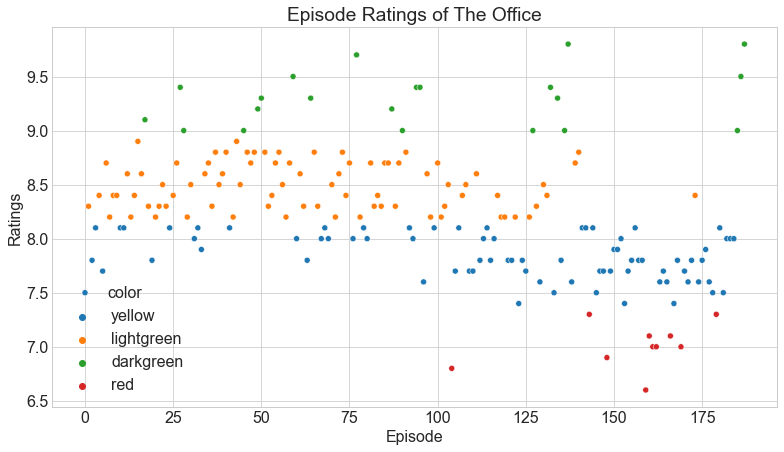

In [9]:
# Scatterplot of popular episodes
sns.scatterplot(df.episode, df.ratings, hue=df.color)
plt.xlabel("Episode")
plt.ylabel("Ratings")
plt.title("Episode Ratings of The Office")

### Episodes and Veiwership

Text(0.5, 1.0, 'Episode Viewership of The Office')

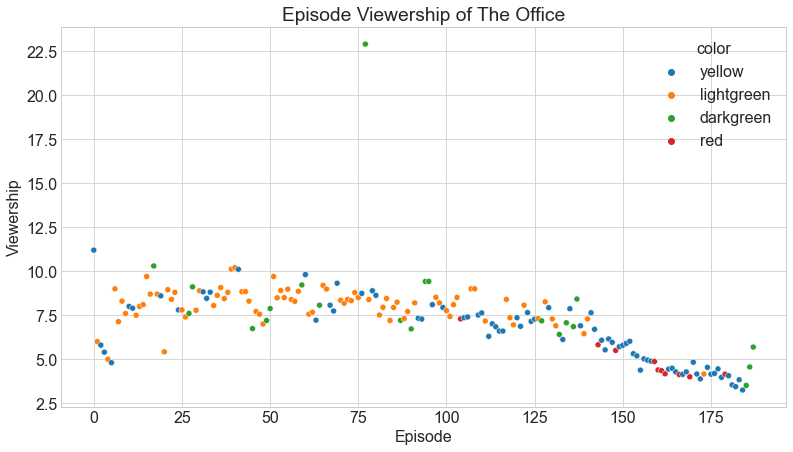

In [10]:
# Scatterplot of popular episodes
sns.scatterplot(df.episode, df.viewership, hue=df.color)
plt.xlabel("Episode")
plt.ylabel("Viewership")
plt.title("Episode Viewership of The Office")

### Scatterplot Takeaways
- From both graphs, the most popular episode stands out
- It looks like the last episodes per season have some of the highest ratings / views
- In terms of ratings, the very last episode has the best rating
- In terms of viewership, 77 stands out whs is "Stress Relief"

### Histogram to look at the distribution of data in the columns

array([[<AxesSubplot:title={'center':'episode'}>,
        <AxesSubplot:title={'center':'season'}>],
       [<AxesSubplot:title={'center':'ratings'}>,
        <AxesSubplot:title={'center':'votes'}>],
       [<AxesSubplot:title={'center':'viewership'}>,
        <AxesSubplot:title={'center':'duration'}>]], dtype=object)

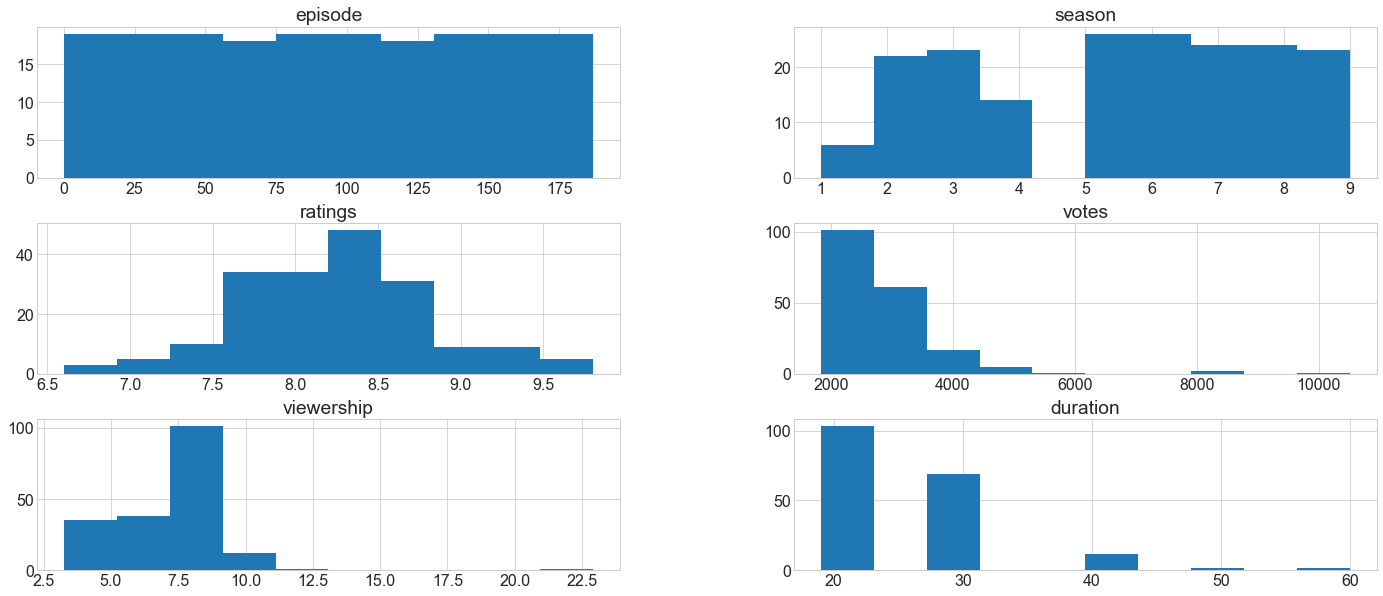

In [11]:
# histogram of the columns in the data
df.hist(figsize=(24, 10), bins=10)

- It looks like ratings is normally distributed  mostly betwen 8.0 to 8.5
- Viewership looks to have a high value around 7.5 with one higher outlier (most likely the "Stress Relief" episode)

# Time Series

In [12]:
# getting the offce time data from wrangle for time series
df = office_time()
df.head() # check_yo_head

Date Range: 2005-03-24 00:00:00 to 2013-05-16 00:00:00
Shape: (188, 15)


,episode,season,episode_title,about,ratings,votes,viewership,duration,director,writers,color,year,month,day,weekday
date,,,,,,,,,,,,,,,
2005-03-24,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,yellow,2005,3,24,Thursday
2005-03-29,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,Ken Kwapis,B. J. Novak,lightgreen,2005,3,29,Tuesday
2005-04-05,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,Ken Whittingham,Paul Lieberstein,yellow,2005,4,5,Tuesday
2005-04-12,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,Bryan Gordon,Michael Schur,yellow,2005,4,12,Tuesday
2005-04-19,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,Greg Daniels,Greg Daniels,lightgreen,2005,4,19,Tuesday


- It looks like the first episode aired on March 24th 2005 (also my birthday)
- The last episode aired on May 16th 2013
- A little over 8 years time span for episodes and seasons

### Data Splitting

#### Percentage Based %

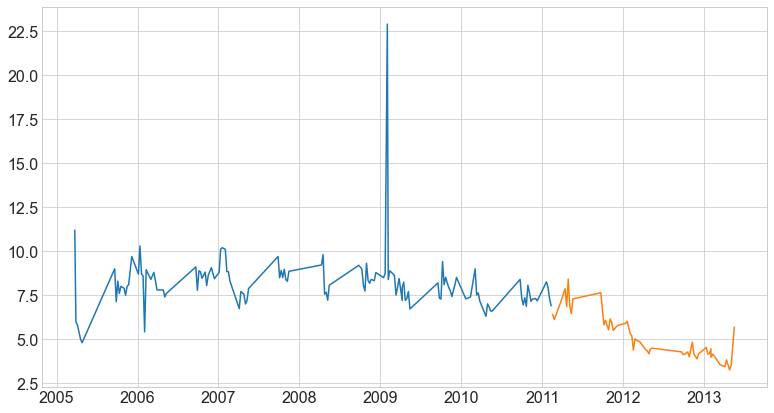

In [13]:
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.viewership)
plt.plot(test.index, test.viewership)

#### Human Based Data Splitting

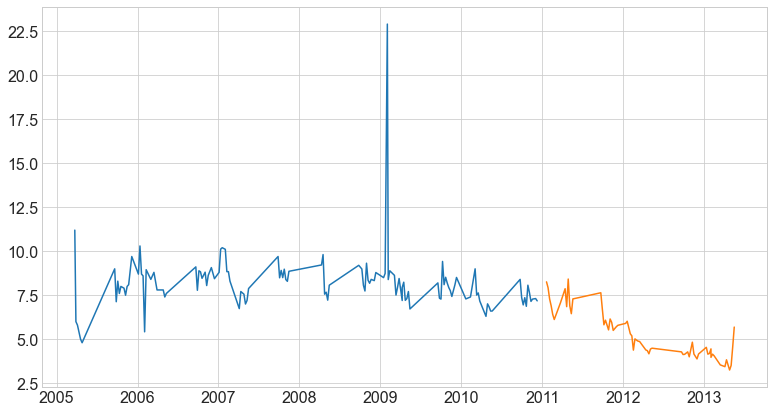

In [14]:
train = df[:'2010'] # includes everything into 2010
test = df['2011':] # everthing from 2011 to the last episode

plt.plot(train.index, train.viewership)
plt.plot(test.index, test.viewership)

### Visualization

In [15]:
# assigning the train viewership data to y 
y = train.viewership
y.head() # check_yo_head

date
2005-03-24    11.2
2005-03-29     6.0
2005-04-05     5.8
2005-04-12     5.4
2005-04-19     5.0
Name: viewership, dtype: float64

<AxesSubplot:ylabel='Frequency'>

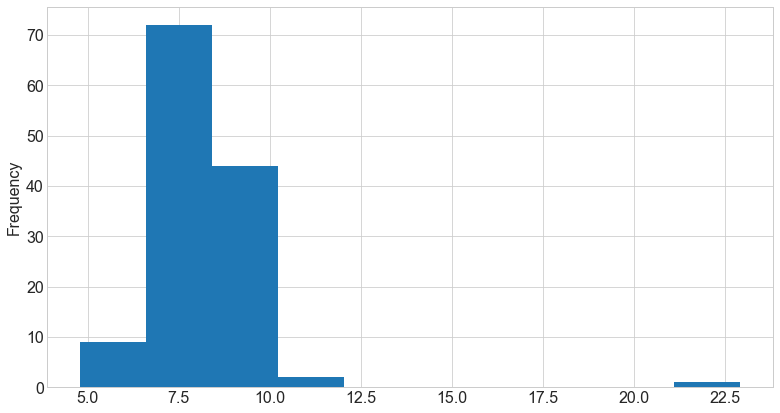

In [16]:
# plotting a histogram of the y data
y.plot.hist()

- This histogram looks similar to the histogram from all the data, so I know I am working with the correct data

### Taking a look at the monthly average views

[Text(0.5, 1.0, 'Average Views by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Views')]

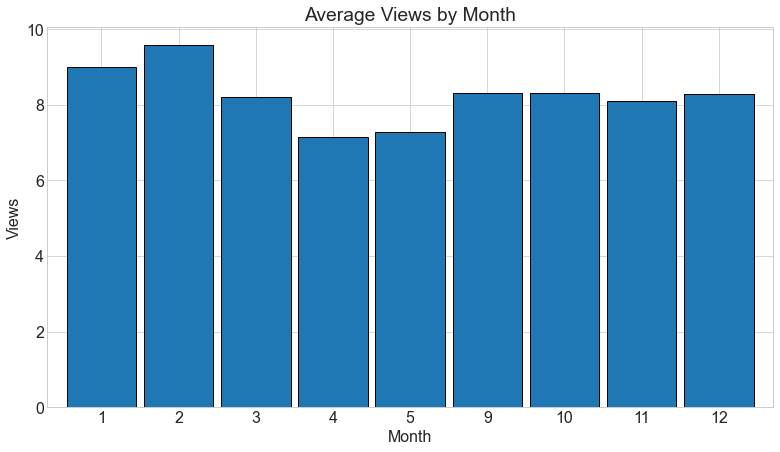

In [17]:
# looking at the average viewership by month
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Views by Month', xlabel='Month', ylabel='Views')

- February had the most views 
- April / May months had the least views

[Text(0.5, 1.0, 'Average Views by Day'),
 Text(0.5, 0, 'Day'),
 Text(0, 0.5, 'Views')]

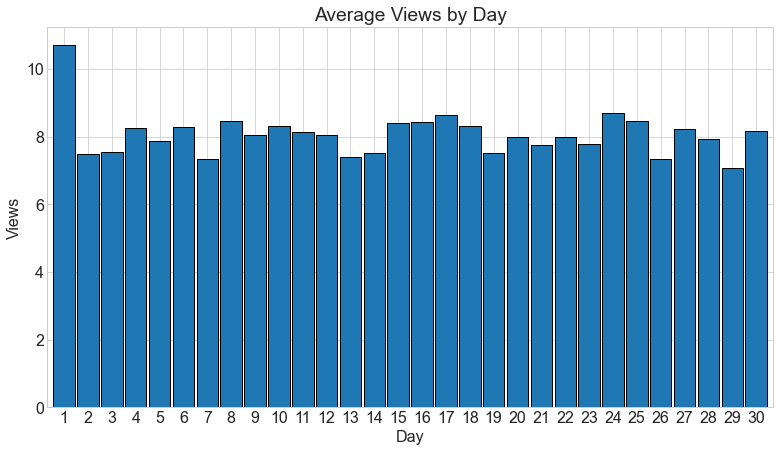

In [18]:
# bar plot of the views by day within a month
ax = y.groupby(y.index.day).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Views by Day', xlabel='Day', ylabel='Views')

- The first day of the month had the most views
- It looks like the 29th day of the month has the least views

[Text(0.5, 1.0, 'Average Views By Weekday')]

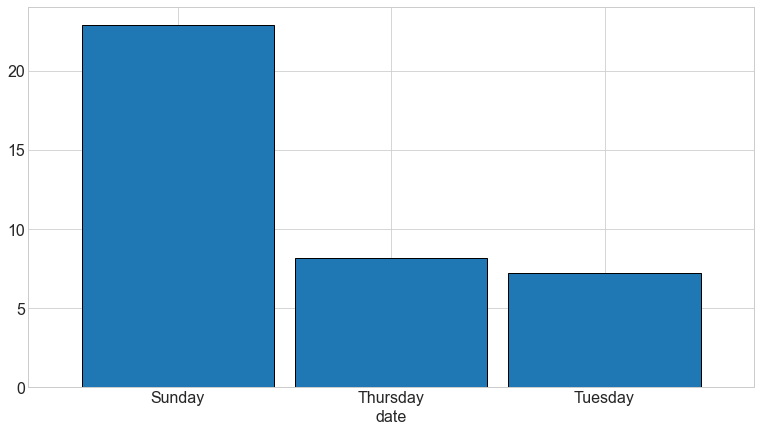

In [19]:
# bar plot of the views by day
y.groupby(y.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Views By Weekday')

- Looks like Sunday is the most popular day to view The Office

<AxesSubplot:xlabel='date'>

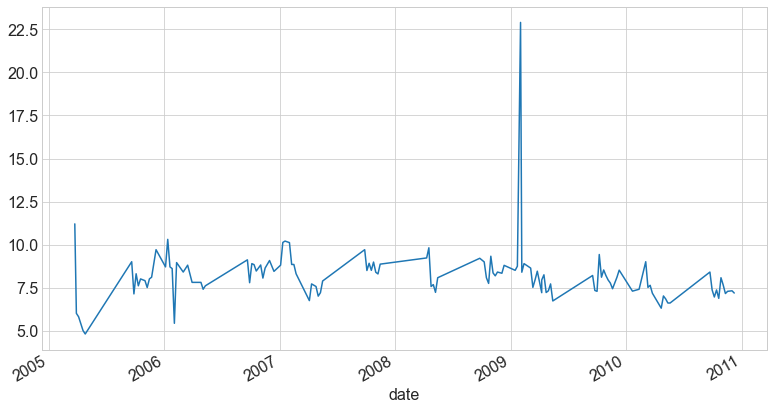

In [20]:
# using a .plot() on th y data to look at the trend over the series
y.plot()

<AxesSubplot:title={'center':'2 week average'}, xlabel='date'>

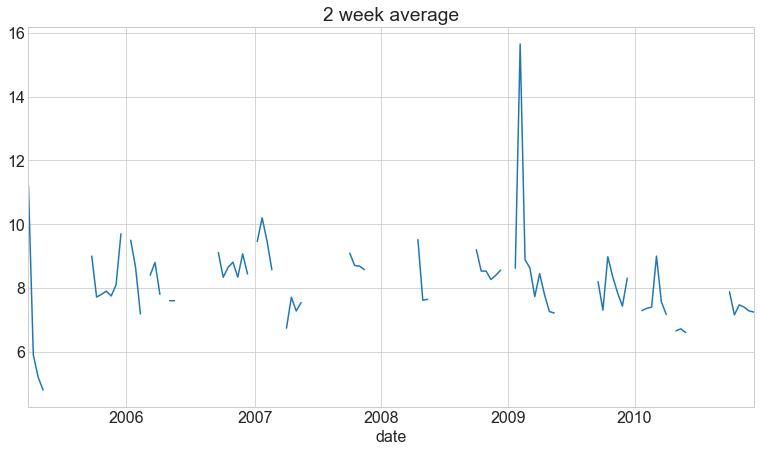

In [21]:
# looking at a 2 week average of viewership
y.resample('2W').mean().plot(title='2 week average')

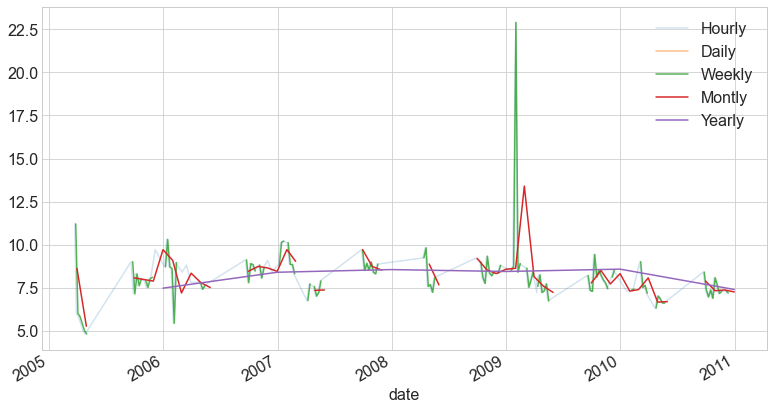

In [22]:
# putting together days, weeks, months, and years of viewership
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

<AxesSubplot:title={'center':'Average week-to-week change in viewership'}, xlabel='date'>

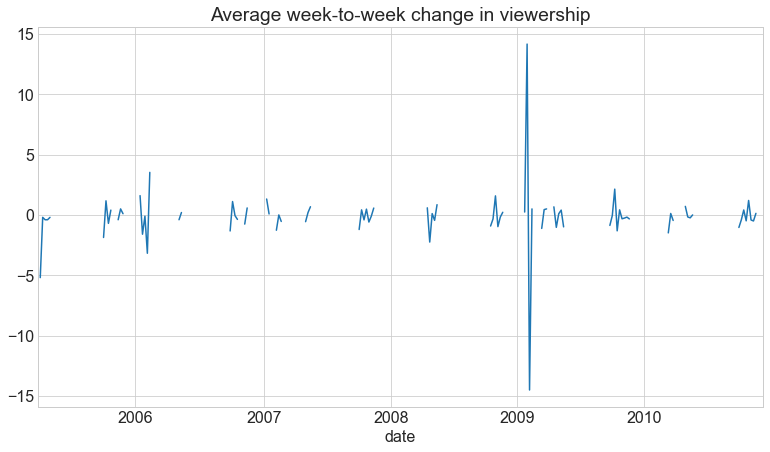

In [23]:
# looking at the weekly change in viewership
y.resample('W').mean().diff().plot(title='Average week-to-week change in viewership')

<AxesSubplot:title={'center':'Average month-to-month change in Viewership'}, xlabel='date'>

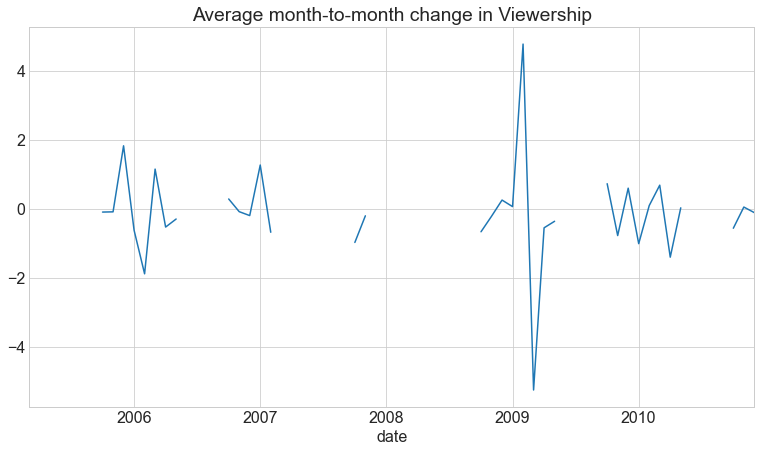

In [24]:
# looking at the monthly change in viewership
y.resample('M').mean().diff().plot(title='Average month-to-month change in Viewership')

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='date'>

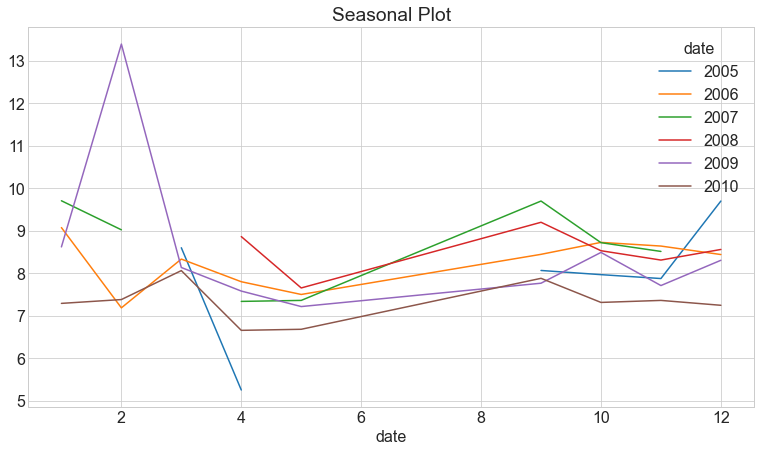

In [25]:
# .unstack turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')
# looking at viewership by year

In [26]:
train = train.resample('D').mean()
# create a categorical feature
train['view_bin'] = pd.qcut(train.viewership, 4, labels=['cold', 'cool', 'warm', 'hot'])
train.groupby('view_bin').mean()

,episode,season,ratings,votes,viewership,duration,year,month,day
view_bin,,,,,,,,,
cold,80.218750,4.781250,8.175000,2847.812500,6.755938,28.968750,2008.437500,6.093750,15.312500
cool,61.016129,4.032258,8.393548,2949.580645,7.736129,26.516129,2007.580645,6.903226,14.548387
warm,62.322581,4.290323,8.396774,2847.225806,8.404516,28.064516,2007.645161,7.580645,13.903226
hot,46.806452,3.548387,8.546774,3472.306452,9.728065,27.177419,2007.032258,6.322581,13.516129


Text(0, 0.5, '% of days in the month')

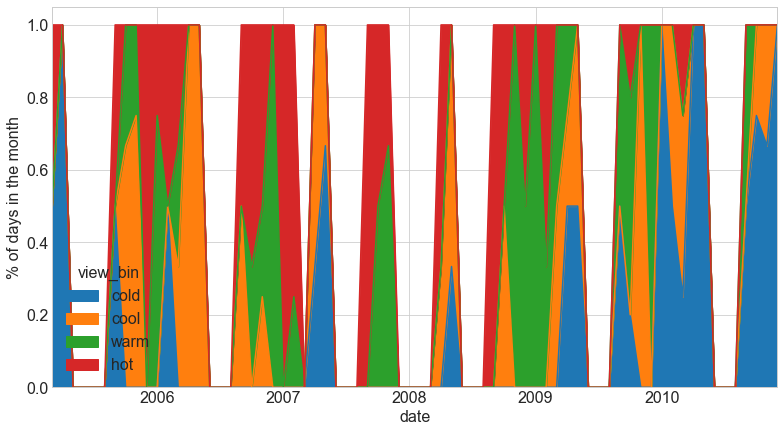

In [27]:
(train.groupby('view_bin')
 .resample('M')
 .size()
 .unstack(0)
 .apply(lambda row: row / row.sum(), axis=1)
 .plot.area()
)
plt.ylabel('% of days in the month')

[Text(0, 0, 'March'),
 Text(1, 0, 'April'),
 Text(2, 0, 'May'),
 Text(3, 0, 'June'),
 Text(4, 0, 'July'),
 Text(5, 0, 'August'),
 Text(6, 0, 'September'),
 Text(7, 0, 'October'),
 Text(8, 0, 'November'),
 Text(9, 0, 'December'),
 Text(10, 0, 'January'),
 Text(11, 0, 'February'),
 Text(12, 0, 'March'),
 Text(13, 0, 'April'),
 Text(14, 0, 'May'),
 Text(15, 0, 'June'),
 Text(16, 0, 'July'),
 Text(17, 0, 'August'),
 Text(18, 0, 'September'),
 Text(19, 0, 'October'),
 Text(20, 0, 'November'),
 Text(21, 0, 'December'),
 Text(22, 0, 'January'),
 Text(23, 0, 'February'),
 Text(24, 0, 'March'),
 Text(25, 0, 'April'),
 Text(26, 0, 'May'),
 Text(27, 0, 'June'),
 Text(28, 0, 'July'),
 Text(29, 0, 'August'),
 Text(30, 0, 'September'),
 Text(31, 0, 'October'),
 Text(32, 0, 'November'),
 Text(33, 0, 'December'),
 Text(34, 0, 'January'),
 Text(35, 0, 'February'),
 Text(36, 0, 'March'),
 Text(37, 0, 'April'),
 Text(38, 0, 'May'),
 Text(39, 0, 'June'),
 Text(40, 0, 'July'),
 Text(41, 0, 'August'),
 Text

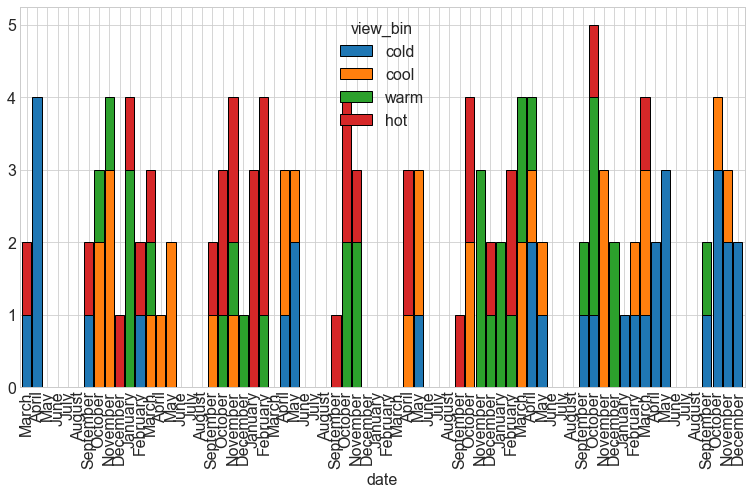

In [28]:
ax = (train
 .groupby('view_bin')
 .resample('M')
 .size()
 .unstack(0)
 .plot.bar(stacked=True, width=.9, ec='black')
)
labels = [pd.to_datetime(t.get_text()).strftime('%B') for t in ax.get_xticklabels()]
ax.set_xticklabels(labels)

## Time Series Modeling

In [29]:
# imports for Modeling

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

from datetime import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

import statsmodels.api as sm
from statsmodels.tsa.api import Holt

In [30]:
# getting the office time model dataframe from wrangle
df = office_time_model()
df.head() # check_yo_head

Date Range: 2005-03-24 00:00:00 to 2013-05-16 00:00:00
Shape: (188, 15)
Model DF Shape: (188, 2)


,ratings,viewership
date,,
2005-03-24,7.5,11.2
2005-03-29,8.3,6.0
2005-04-05,7.8,5.8
2005-04-12,8.1,5.4
2005-04-19,8.4,5.0


In [31]:
# splitting the data
train_size = int(len(df) * .5)
validate_size = int(len(df) * .3)
test_size = int(len(df) - train_size - validate_size)
validate_end_index = train_size + validate_size

# split into train, validation, test
train = df[: train_size]
validate = df[train_size : validate_end_index]
test = df[validate_end_index : ]

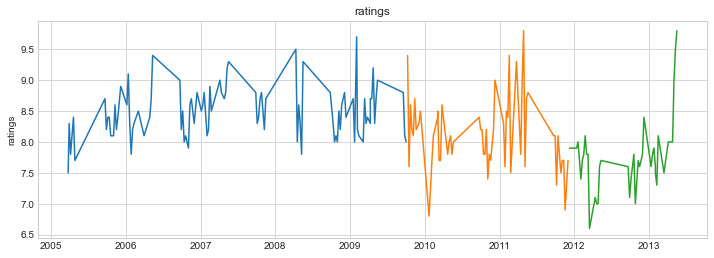

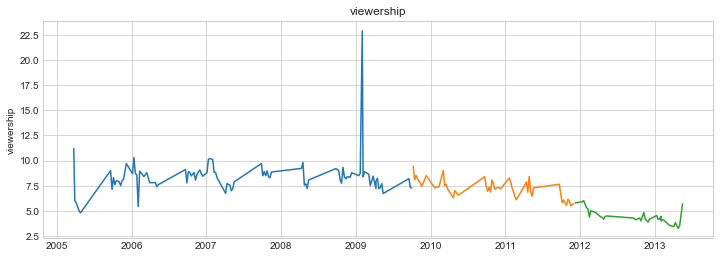

In [32]:
for col in train.columns:
    plt.figure(figsize=(12,4))
    plt.plot(train[col])
    plt.plot(validate[col])
    plt.plot(test[col])
    plt.ylabel(col)
    plt.title(col)
    plt.show()

In [33]:
# evaluation function to compute rmse

def evaluate(target_var):
    rmse = sqrt(mean_squared_error(validate[target_var], yhat_df[target_var]))
    return rmse

In [34]:
# plot and evaluate 
def plot_and_eval(target_var):
    plt.figure(figsize = (12,4))
    plt.plot(train[target_var], label = 'Train', linewidth = 1)
    plt.plot(validate[target_var], label = 'Validate', linewidth = 1)
    plt.plot(yhat_df[target_var])
    plt.title(target_var)
    rmse = evaluate(target_var)
    print(target_var, '-- RMSE: {:.0f}'.format(rmse))
    plt.show()

In [35]:
# Create the empty dataframe
eval_df = pd.DataFrame(columns=['model_type', 'target_var', 'rmse'])

# function to store rmse for comparison purposes
def append_eval_df(model_type, target_var):
    rmse = evaluate(target_var)
    d = {'model_type': [model_type], 'target_var': [target_var], 'rmse': [rmse]}
    d = pd.DataFrame(d)
    return eval_df.append(d, ignore_index = True)

In [36]:
# Forcast
# Last observed value
views = train['viewership'][-1:][0]
ratings = round(train['ratings'][-1:][0],2)

yhat_df = pd.DataFrame({'viewership': [views], 'ratings': [ratings]}, 
                       index = validate.index)

yhat_df.head(2)

,viewership,ratings
date,,
2009-10-08,7.28,8.0
2009-10-08,7.28,8.0


ratings -- RMSE: 1


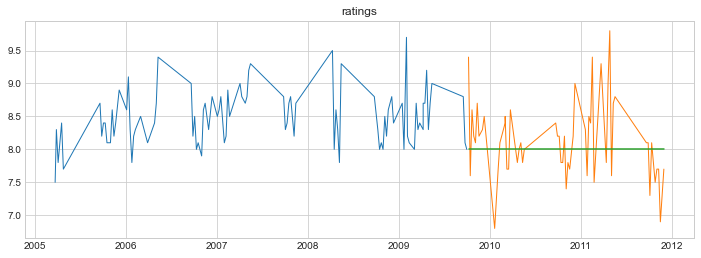

viewership -- RMSE: 1


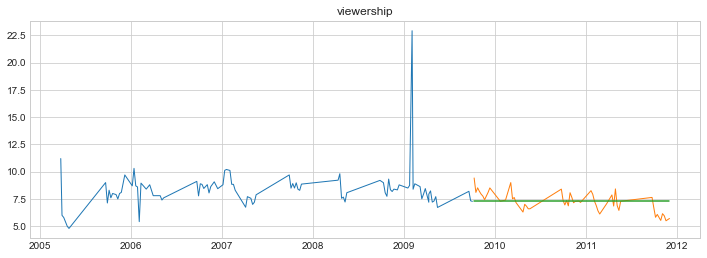

In [37]:
for col in train.columns:
    plot_and_eval(col)

In [38]:
for col in train.columns:
    eval_df = append_eval_df(model_type = 'last_observed_value', 
                             target_var = col)    
eval_df

,model_type,target_var,rmse
0,last_observed_value,ratings,0.629768
1,last_observed_value,viewership,0.923812


In [39]:
# simple average

views = round(train['viewership'].mean(), 2)
ratings = round(train['ratings'].mean(), 2)

def make_predictions():
    yhat_df = pd.DataFrame({'viewership': [views],
                            'ratings': [ratings],
                           }, index = validate.index)
    return yhat_df

yhat_df = make_predictions()
yhat_df.head() # check_yo_head

,viewership,ratings
date,,
2009-10-08,8.33,8.47
2009-10-08,8.33,8.47
2009-10-15,8.33,8.47
2009-10-22,8.33,8.47
2009-10-29,8.33,8.47


ratings -- RMSE: 1


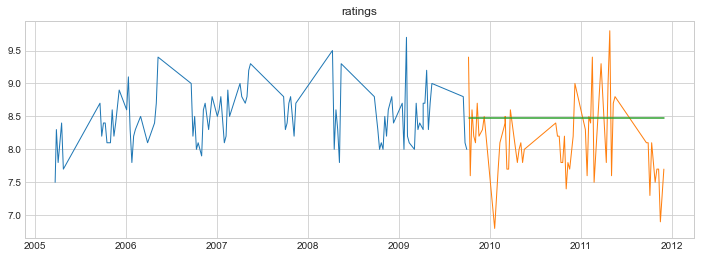

viewership -- RMSE: 1


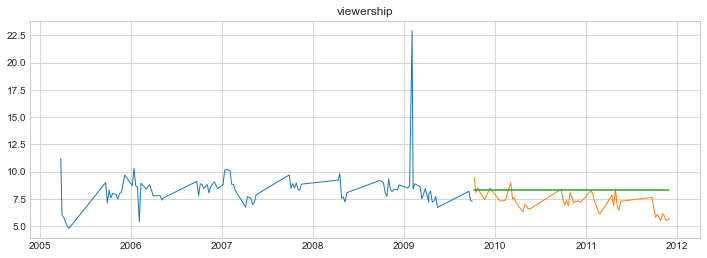

In [40]:
for col in train.columns:
    plot_and_eval(col)

In [41]:
# evaluate
for col in train.columns:
    eval_df = append_eval_df(model_type='simple_average', 
                             target_var = col)
eval_df

,model_type,target_var,rmse
0,last_observed_value,ratings,0.629768
1,last_observed_value,viewership,0.923812
2,simple_average,ratings,0.686638
3,simple_average,viewership,1.373382


In [42]:
# moving average
# compute a 30 day rolling average, 
# use the most recent/last 30 day period value to predict forward. 

period = 30

views = round(train['viewership'].rolling(period).mean().iloc[-1], 2)
ratings = round(train['ratings'].rolling(period).mean().iloc[-1], 2)

yhat_df = make_predictions()
yhat_df.head()

,viewership,ratings
date,,
2009-10-08,8.62,8.5
2009-10-08,8.62,8.5
2009-10-15,8.62,8.5
2009-10-22,8.62,8.5
2009-10-29,8.62,8.5


ratings -- RMSE: 1


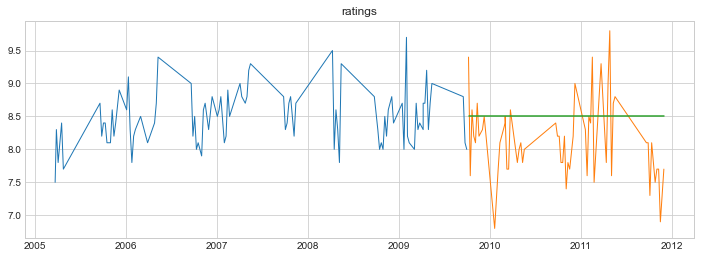

viewership -- RMSE: 2


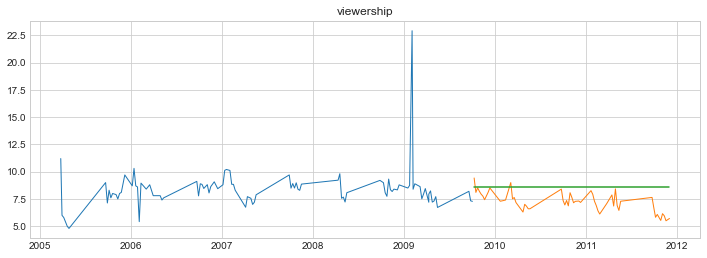

In [43]:
for col in train.columns:
    plot_and_eval(col)

In [44]:
for col in train.columns:
    eval_df = append_eval_df(model_type='30d moving average', 
                             target_var = col)
eval_df

,model_type,target_var,rmse
0,last_observed_value,ratings,0.629768
1,last_observed_value,viewership,0.923812
2,simple_average,ratings,0.686638
3,simple_average,viewership,1.373382
4,30d moving average,ratings,0.700892
5,30d moving average,viewership,1.600004


In [45]:
periods = [1, 7, 14, 21]

for p in periods:
    views = round(train['viewership'].rolling(p).mean().iloc[-1], 2)
    ratings = round(train['ratings'].rolling(p).mean().iloc[-1], 2)
    yhat_df = make_predictions()
    model_type = str(p) + 'd moving average'
    eval_df = append_eval_df(model_type = model_type,
                             target_var = 'viewership'
                            )
    eval_df = append_eval_df(model_type = model_type,
                             target_var = 'ratings'
                            )
eval_df 

,model_type,target_var,rmse
0,last_observed_value,ratings,0.629768
1,last_observed_value,viewership,0.923812
2,simple_average,ratings,0.686638
3,simple_average,viewership,1.373382
4,30d moving average,ratings,0.700892
5,30d moving average,viewership,1.600004
6,1d moving average,viewership,0.923812
7,1d moving average,ratings,0.629768
8,7d moving average,viewership,0.926402
9,7d moving average,ratings,0.749257


In [46]:
# get the min rmse for each variable

min_rmse_ratings = eval_df.groupby('target_var')['rmse'].min()[0]
min_rmse_views = eval_df.groupby('target_var')['rmse'].min()[1]

# filter only the rows that match those rmse to find out 
# which models are best thus far
eval_df[((eval_df.rmse == min_rmse_ratings) | 
         (eval_df.rmse == min_rmse_views)
        )]

,model_type,target_var,rmse
0,last_observed_value,ratings,0.629768
1,last_observed_value,viewership,0.923812
6,1d moving average,viewership,0.923812
7,1d moving average,ratings,0.629768


ratings -- RMSE: 1


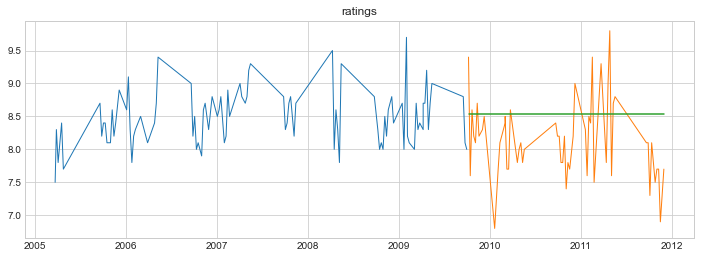

viewership -- RMSE: 2


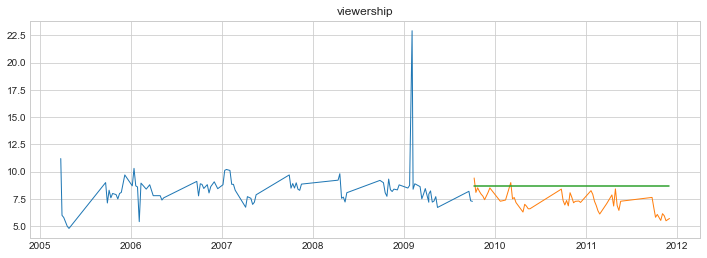

In [47]:
for col in train.columns:
    plot_and_eval(target_var = col)

In [48]:
eval_df

,model_type,target_var,rmse
0,last_observed_value,ratings,0.629768
1,last_observed_value,viewership,0.923812
2,simple_average,ratings,0.686638
3,simple_average,viewership,1.373382
4,30d moving average,ratings,0.700892
5,30d moving average,viewership,1.600004
6,1d moving average,viewership,0.923812
7,1d moving average,ratings,0.629768
8,7d moving average,viewership,0.926402
9,7d moving average,ratings,0.749257


# Clustering

In [49]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# default pandas decimal number display format
pd.options.display.float_format = '{:20,.2f}'.format

from wrangle import the_office

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Statistical Tests
import scipy.stats as stats

# Visualizing
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve

In [50]:
# getting the cluster dataframe from wrangle file
df =  cluster_df()
df.head() # check_yo_head

,episode,ratings
0,0,7.50
1,1,8.30
2,2,7.80
3,3,8.10
4,4,8.40


In [51]:
# train validate test split
# split test off, 20% of original df size. 
train_validate, test = train_test_split(df, test_size=.2, 
                                        random_state=42)

# split validate off, 30% of what remains (24% of original df size)
# thus train will be 56% of original df size. 
train, validate = train_test_split(train_validate, test_size=.3, 
                                   random_state=42)

print("train observations: ", train.size)
print("validate observations: ", validate.size)
print("test observations: ", test.size)

train observations:  210
validate observations:  90
test observations:  76


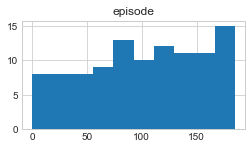

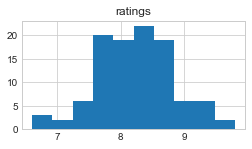

In [52]:
# what is the distribution of each variable
for col in train.columns:
    plt.figure(figsize=(4,2))
    plt.hist(train[col])
    plt.title(col)
    plt.show()

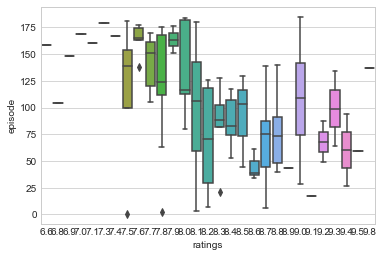

In [53]:
sns.boxplot(train.ratings, train.episode)

plt.show()

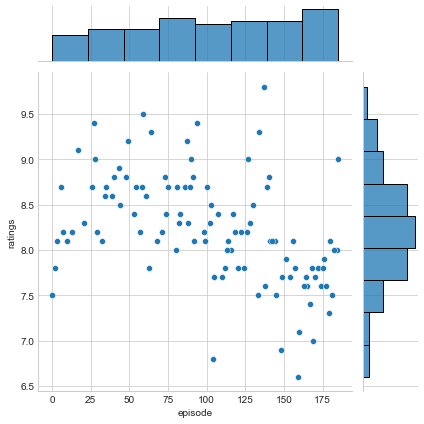

In [54]:
sns.jointplot(x="episode", y="ratings", data=train)
plt.xlabel("Episode")
plt.ylabel("Rating")
plt.show()

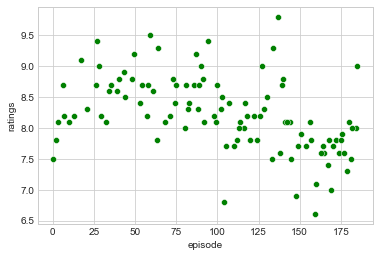

In [56]:
# scatterplot of episodes and their ratings
sns.scatterplot(x='episode', y='ratings',
                data=train, color='green')
plt.show()

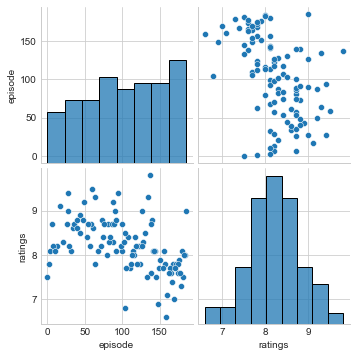

In [62]:
sns.pairplot(train)
plt.show()

# K-Means

In [63]:
from sklearn.cluster import KMeans

In [64]:
X = df

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [65]:
kmeans.cluster_centers_

array([[156.5       ,   7.94193548],
       [ 94.        ,   8.29206349],
       [ 31.        ,   8.47301587]])

In [66]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,episode,ratings
0,156.50,7.94
1,94.00,8.29
2,31.00,8.47


Text(0.5, 1.0, 'Visualizing Cluster Centers')

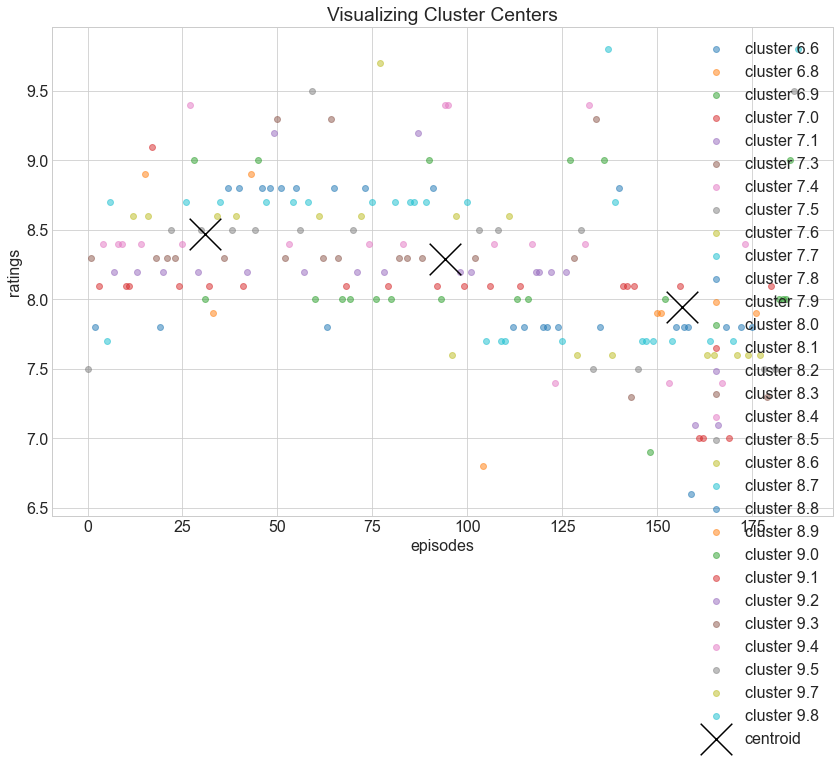

In [106]:
plt.figure(figsize=(14, 9))

for cluster, subset in df.groupby('ratings'): # maybe need to convert to int and round numbers ???
    plt.scatter(subset.episode, subset.ratings, label='cluster ' + str(cluster), alpha=.5)

centroids.plot.scatter(y='ratings', x='episode', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('episodes')
plt.ylabel('ratings')
plt.title('Visualizing Cluster Centers')

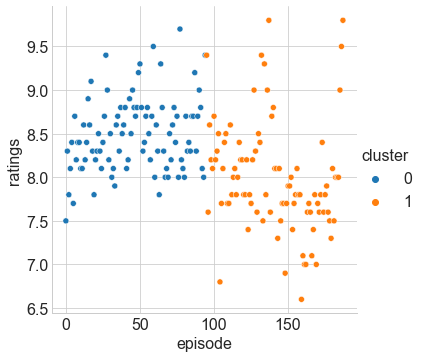

In [96]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
df['cluster'] = kmeans.predict(X)

sns.relplot(data=df, x='episode', y='ratings', hue='cluster')

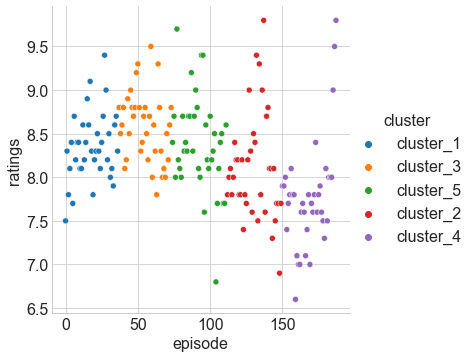

In [93]:
kmeans = KMeans(n_clusters=5).fit(X)
df['cluster'] = kmeans.predict(X)
df.cluster = 'cluster_' + (df.cluster + 1).astype('str')
sns.relplot(data=df, x='episode', y='ratings', hue='cluster')

In [77]:
X = X.drop(columns='cluster')
X.head()

,episode,ratings
0,0,7.50
1,1,8.30
2,2,7.80
3,3,8.10
4,4,8.40


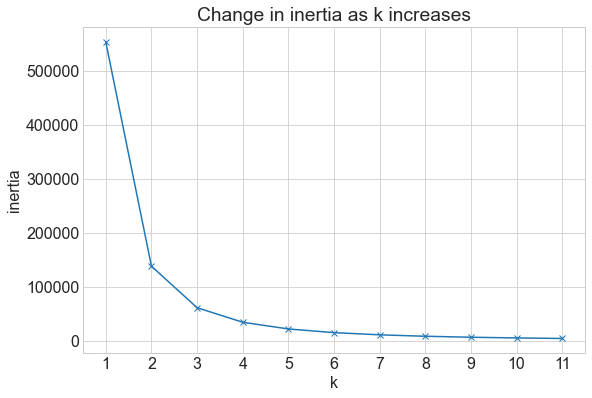

In [92]:
# choosing k with inertia: elbow method
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(1, 12)}).plot(marker='x')
    plt.xticks(range(1, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

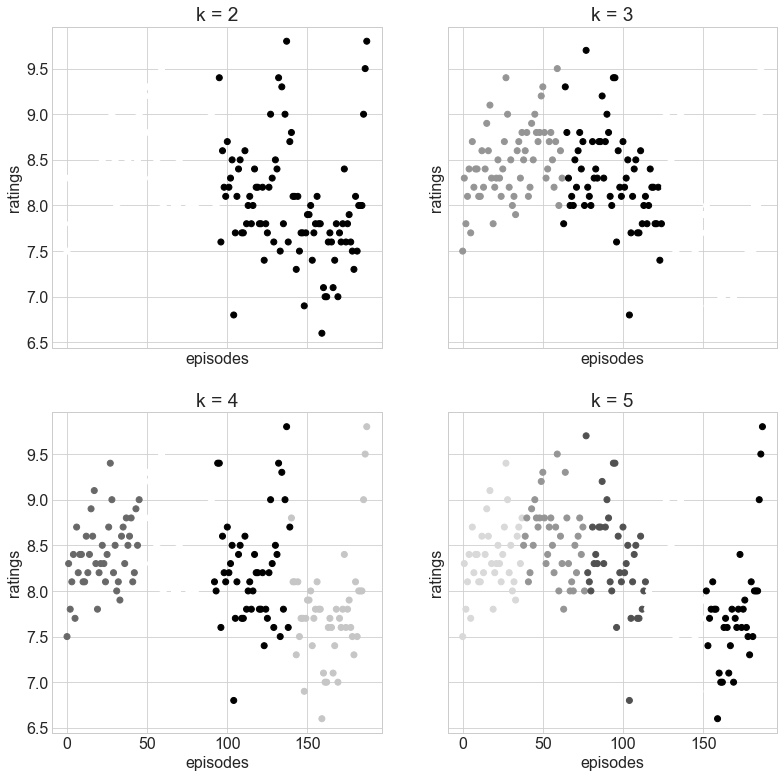

In [91]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.episode, X.ratings, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='episodes', ylabel='ratings')

In [81]:
# list of variables I will cluster on. 
cluster_vars = ['episode', 'ratings']
cluster_name = 'area_cluster'
k_range = range(2,20)

In [82]:
def find_k(X_train, cluster_vars, k_range):
    sse = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k)

        # X[0] is our X_train dataframe..the first dataframe in the list of dataframes stored in X. 
        kmeans.fit(X_train[cluster_vars])

        # inertia: Sum of squared distances of samples to their closest cluster center.
        sse.append(kmeans.inertia_) 

    # compute the difference from one k to the next
    delta = [round(sse[i] - sse[i+1],0) for i in range(len(sse)-1)]

    # compute the percent difference from one k to the next
    pct_delta = [round(((sse[i] - sse[i+1])/sse[i])*100, 1) for i in range(len(sse)-1)]

    # create a dataframe with all of our metrics to compare them across values of k: SSE, delta, pct_delta
    k_comparisons_df = pd.DataFrame(dict(k=k_range[0:-1], 
                             sse=sse[0:-1], 
                             delta=delta, 
                             pct_delta=pct_delta))

    # plot k with inertia
    plt.plot(k_comparisons_df.k, k_comparisons_df.sse, 'bx-')
    plt.xlabel('k')
    plt.ylabel('SSE')
    plt.title('The Elbow Method to find the optimal k\nFor which k values do we see large decreases in SSE?')
    plt.show()

    # plot k with pct_delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.pct_delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Percent Change')
    plt.title('For which k values are we seeing increased changes (%) in SSE?')
    plt.show()

    # plot k with delta
    plt.plot(k_comparisons_df.k, k_comparisons_df.delta, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Absolute Change in SSE')
    plt.title('For which k values are we seeing increased changes (absolute) in SSE?')
    plt.show()

    return k_comparisons_df

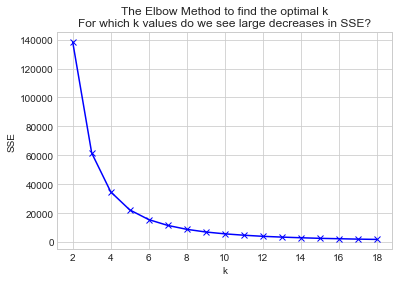

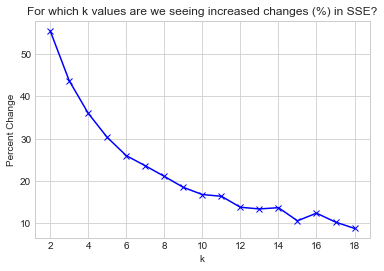

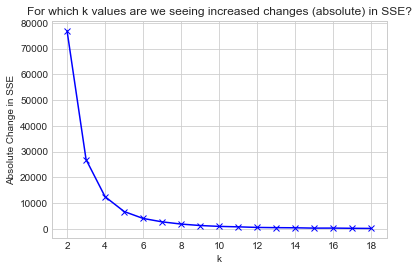

,k,sse,delta,pct_delta
0,2,"138,515.46","76,940.00",55.50
1,3,"61,575.48","26,912.00",43.70
2,4,"34,663.22","12,468.00",36.00
3,5,"22,195.18","6,722.00",30.30
4,6,"15,473.64","4,028.00",26.00
5,7,"11,445.52","2,703.00",23.60
6,8,"8,743.02","1,843.00",21.10
7,9,"6,900.02","1,279.00",18.50
8,10,"5,620.52",944.00,16.80
9,11,"4,676.29",765.00,16.40


In [83]:
find_k(X, cluster_vars, k_range)

In [84]:
k = 4
# as reminders: 
cluster_vars = ['episode', 'ratings']
cluster_name = 'area_cluster'

In [85]:
def create_clusters(X_train, k, cluster_vars):
    # create kmean object
    kmeans = KMeans(n_clusters=k, random_state = 13)

    # fit to train and assign cluster ids to observations
    kmeans.fit(X_train[cluster_vars])

    return kmeans

In [86]:
kmeans = create_clusters(X, k, cluster_vars)

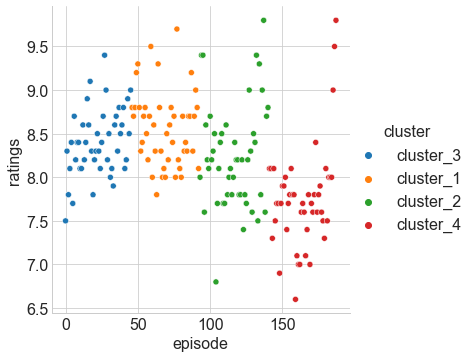

In [89]:
kmeans = KMeans(n_clusters=4).fit(X)
df['cluster'] = kmeans.predict(X)
df.cluster = 'cluster_' + (df.cluster + 1).astype('str')
sns.relplot(data=df, x='episode', y='ratings', hue='cluster')